In [13]:
import numpy as np 
from svd_jacobi import svd_jacobi

In [14]:
def main():
  print("\nSVD decomposition with Jacobi Algorithm\n ")
  np.set_printoptions(precision=4, suppress=True,
    floatmode='fixed')

  A = np.array([
    [1, 2, 4],
    [5, 3, 8],
    [7, 8, 10],
    [9, 2, 7]], dtype=np.float64)

  print("\nSource matrix: ")
  print(A)

  U, s, Vh = svd_jacobi(A)

  print("\nU = "); print(U)
  print("\ns = "); print(s)
  print("\nVh = "); print(Vh)

  U, s, Vh = np.linalg.svd(A, full_matrices=False)
  print("\nUsing linalg.svd(): ")
  print("\nU = "); print(U)
  print("\ns = "); print(s)
  print("\nVh = "); print(Vh)

  print("\nEnd demo ")

if __name__ == "__main__":
  main()


SVD decomposition with Jacobi Algorithm
 

Source matrix: 
[[ 1.0000  2.0000  4.0000]
 [ 5.0000  3.0000  8.0000]
 [ 7.0000  8.0000 10.0000]
 [ 9.0000  2.0000  7.0000]]

U = 
[[ 0.2018 -0.3031 -0.4996]
 [ 0.4667  0.0002 -0.6874]
 [ 0.6842 -0.5207  0.5078]
 [ 0.5229  0.7981  0.1418]]

s = 
[20.9826  4.6090  2.1180]

Vh = 
[[ 0.5733  0.3966  0.7169]
 [ 0.7021 -0.6889 -0.1803]
 [ 0.4223  0.6067 -0.6734]]

Using linalg.svd(): 

U = 
[[-0.2018 -0.3031  0.4996]
 [-0.4667  0.0002  0.6874]
 [-0.6842 -0.5207 -0.5078]
 [-0.5229  0.7981 -0.1418]]

s = 
[20.9826  4.6090  2.1180]

Vh = 
[[-0.5733 -0.3966 -0.7169]
 [ 0.7021 -0.6889 -0.1803]
 [-0.4223 -0.6067  0.6734]]

End demo 


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and preprocess image
img = Image.open("images/test_img.jpg")
A = np.array(img, dtype=float)
A = A / 255.0  # normalize
print(A.shape)


(263, 300)


In [7]:
U, s, Vh = svd_jacobi(A)


In [16]:
def reconstruct_image(U, s, Vh, k):
    S = np.zeros((U.shape[1], Vh.shape[0]))
    np.fill_diagonal(S, s)
    A_k = U[:, :k] @ S[:k, :k] @ Vh[:k, :]
    return np.clip(A_k, 0, 1)


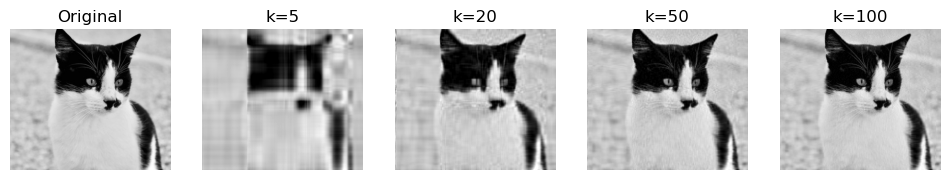

In [17]:
ks = [5, 20, 50, 100]
plt.figure(figsize=(12, 6))
plt.subplot(1, len(ks)+1, 1)
plt.imshow(A, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, k in enumerate(ks):
    A_k = reconstruct_image(U, s, Vh, k)
    plt.subplot(1, len(ks)+1, i+2)
    plt.imshow(A_k, cmap='gray')
    plt.title(f'k={k}')
    plt.axis('off')

plt.show()
